In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Sales_English(basic clean).csv')
df.head()

,Customer Type,Sales Representative,Province,City,Most Recent Activity,Most Recent Sales Representative,Customer Pool,Data Creator,Claim Date,Recent Change Date,...,DUDUDU? (Yes/No),Source Code,Customer Update Status,Percentage,Program Sales Total,Expected sales,Number of Calls,Repeated? (Yes/No),Repeated Date,Most Recent Publish Date
0,Individual,Weijingjuan,unknown,unknown,2021-09-15,Weijingjuan,Entire - Collectible,Zhangmeng,2021-09-15,2021-10-09 15:08,...,False,C,1,0.05,588000,29400.00,3,unknown,unknown,2021-09-15 16:51
1,Individual,Lishanshan,unknown,unknown,2021-10-03,Lishanshan,Entire,Hemengjun,2021-01-16,2021-10-03 16:42,...,False,C,1,0.05,588000,29400.00,1,Yes,2021-01-06,2021-10-03 16:42
2,Individual,Hewei,unknown,unknown,2021-04-13,Hewei,Entire,Hemengjun,2021-01-16,2021-08-20 10:27,...,False,C,unknown,0.00,268000,0,0,unknown,unknown,unknown
3,Individual,Lishanshan,unknown,unknown,2021-08-16,Lishanshan,Entire,Hemengjun,2021-01-16,2021-08-16 17:06,...,False,C,1,0.05,588000,29400.00,2,Yes,2021-02-03,2021-08-16 17:06
4,Individual,Zhouwei,unknown,unknown,2021-09-24,Zhouwei,Entire,Hemengjun,unknown,2021-09-24 15:07,...,True,C,1,0.05,300000,15000.00,5,unknown,unknown,2021-09-24 15:07


In [ ]:
df.columns

Index(['Customer Type', 'Sales Representative', 'Province', 'City',
       'Most Recent Activity', 'Most Recent Sales Representative',
       'Customer Pool', 'Data Creator', 'Claim Date', 'Recent Change Date',
       'Recent editor', 'Status', 'Belonging Department',
       'Business Registration', 'Do-Not-Disturb', 'Number of Signed Contract',
       'Amount Received', 'Total Contract Amount', 'Account Receivable',
       'Non-Collectibles', 'Amount to be collected', 'Actual Amount Collected',
       'Effective Sales Amount', 'Total Sales Amount', 'Finished Customer',
       'Customer Rating', 'Interest Category', 'Customer Source',
       'Source Secondary Classification', 'Source Third Classification',
       'Source Fourth Classification', 'Business Category', 'Interest Program',
       'Information Date', 'Customer Source Star Rating', 'DUDUDU? (Yes/No)',
       'Source Code', 'Customer Update Status', 'Percentage',
       'Program Sales Total', 'Expected sales', 'Number of Calls

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10833 entries, 0 to 10832
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer Type                     10833 non-null  object 
 1   Sales Representative              10833 non-null  object 
 2   Province                          10833 non-null  object 
 3   City                              10833 non-null  object 
 4   Most Recent Activity              10833 non-null  object 
 5   Most Recent Sales Representative  10833 non-null  object 
 6   Customer Pool                     10833 non-null  object 
 7   Data Creator                      10833 non-null  object 
 8   Claim Date                        10833 non-null  object 
 9   Recent Change Date                10833 non-null  object 
 10  Recent editor                     10833 non-null  object 
 11  Status                            10833 non-null  object 
 12  Belo

In [ ]:
df['Source Secondary Classification'].unique()

array(['Media', 'Bidding', 'SEO', 'unknown', 'Enrollment Proxy',
       'Self-Media', 'Student Recommend', 'Past Student Referral',
       'Own Data', 'Others', 'Referral', '400Phone', 'City Partner',
       'Teacher Recommend', 'Jiatui', 'Teach/Research Activity',
       'Zhishijianghu', 'OnlineBD', 'Online University'], dtype=object)

In [ ]:
df['Customer Source'].unique()

array(['Online Operations', 'Channel Center', 'unknown', 'Self-employed',
       'Teaching Center', 'Alumni Center', 'Online University',
       'Media video', 'Data Operations', 'Data Management', 'EMC'],
      dtype=object)

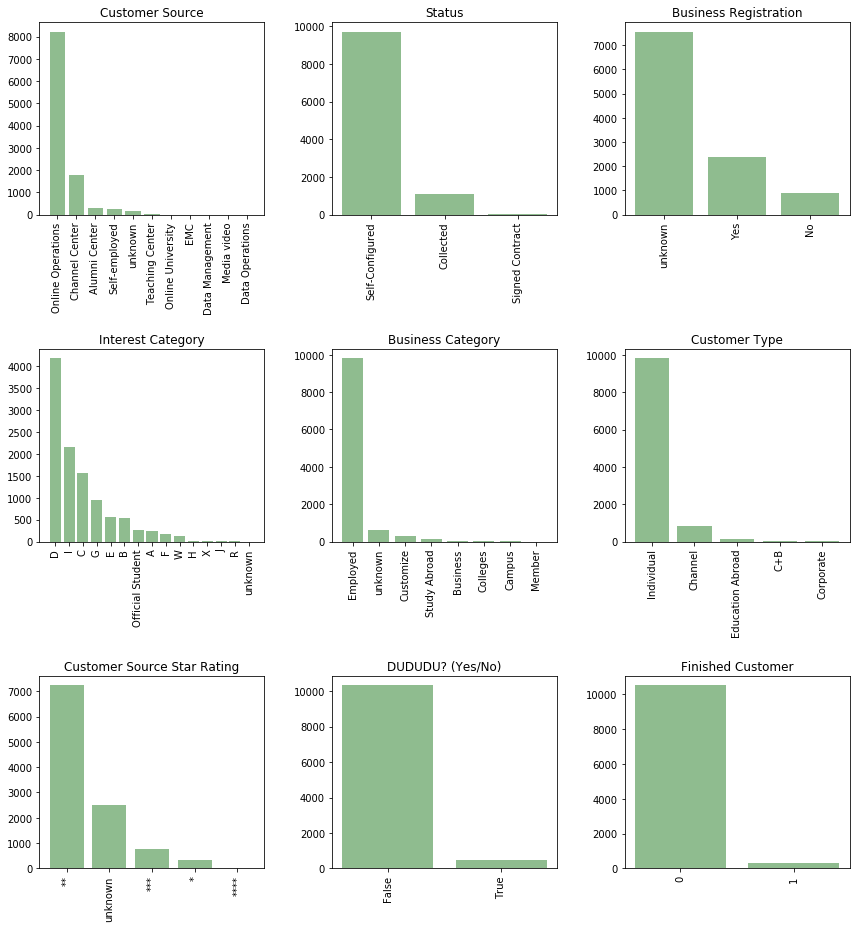

In [ ]:
# 9 important categoraical features
categorical_col = ['Customer Source', 'Status', 'Business Registration', 'Interest Category', \
                   'Business Category', 'Customer Type', 'Customer Source Star Rating', 'DUDUDU? (Yes/No)', \
                   'Finished Customer']

fig, axs = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (12, 13))

count = 0
for c in categorical_col:
    value_counts = df[c].value_counts()
    subplot_x = count // 3
    subplot_y = count % 3
    x_pos = np.arange(0, len(value_counts))  
    axs[subplot_x, subplot_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = 'darkseagreen')
    axs[subplot_x, subplot_y].set_title(c)
    
    for tick in axs[subplot_x, subplot_y].get_xticklabels():
        tick.set_rotation(90)
    count += 1

plt.tight_layout()
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()

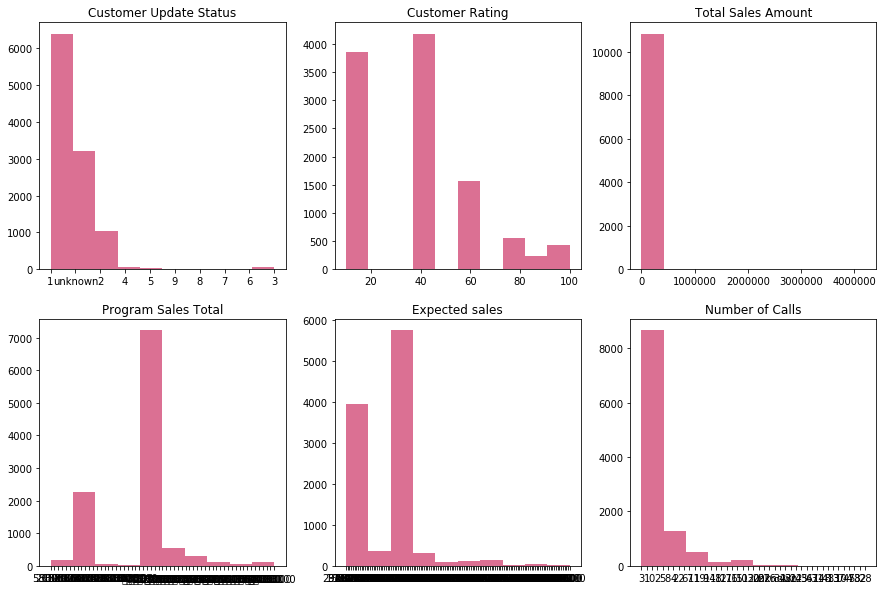

In [ ]:
# 6 numerical features
numerical_col = ['Customer Update Status', 'Customer Rating', 'Total Sales Amount', 'Program Sales Total', 'Expected sales', \
                 'Number of Calls']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))

count = 0
xticks = np.arange(0, 98000, 50)

for n in numerical_col:
    subplot_x = count // 3
    subplot_y = count % 3
    
    axs[subplot_x, subplot_y].hist(df[n], color = 'palevioletred')
    axs[subplot_x, subplot_y].set_title(n)
#     axs.set_xticks(axs.get_xticks()[::2])  
    
    count += 1

# axs[1][0].set_xticks(xticks)
# axs[1][1].set_xticks(xticks)
# axs[1][2].set_xticks(xticks)
# plt.margins(0.2)
plt.show()

In [ ]:
df.describe()

,Number of Signed Contract,Amount Received,Total Contract Amount,Account Receivable,Non-Collectibles,Amount to be collected,Actual Amount Collected,Effective Sales Amount,Total Sales Amount,Finished Customer,Customer Rating,Percentage
count,10833.000000,1.083300e+04,10833.000000,10833.000000,1.083300e+04,1.083300e+04,1.083300e+04,10833.000000,1.083300e+04,10833.000000,10833.000000,10833.000000
mean,0.001754,4.537534e+03,272.495246,601.390252,4.736285e+02,9.920454e+02,5.138925e+03,0.052894,5.612553e+03,0.028801,37.693160,0.055109
std,0.041845,4.310633e+04,10174.384790,12825.413357,2.375057e+04,2.574148e+04,4.609909e+04,0.342774,6.014162e+04,0.167254,25.420671,0.078164
min,0.000000,0.000000e+00,0.000000,-12000.000000,-1.680000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,10.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,10.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,40.000000,0.050000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,60.000000,0.050000
max,1.000000,2.100000e+06,600000.000000,618836.000000,2.100000e+06,2.100000e+06,2.100000e+06,8.000000,4.200000e+06,1.000000,100.000000,1.000000


In [ ]:
max(df[df['Program Sales Total'] != 'unknown']['Program Sales Total'])

'98000'

# Correlation Matrix
Range: [-1, 1]
* No correlaiton r=0
* Very weak correlation: r<20
* Weak correlation: between 0.20-0.49
* Moderate correlation: between 0.5-0.79
* Strong correlation: between 0.8-0.99
* Perfect correlation: r=1

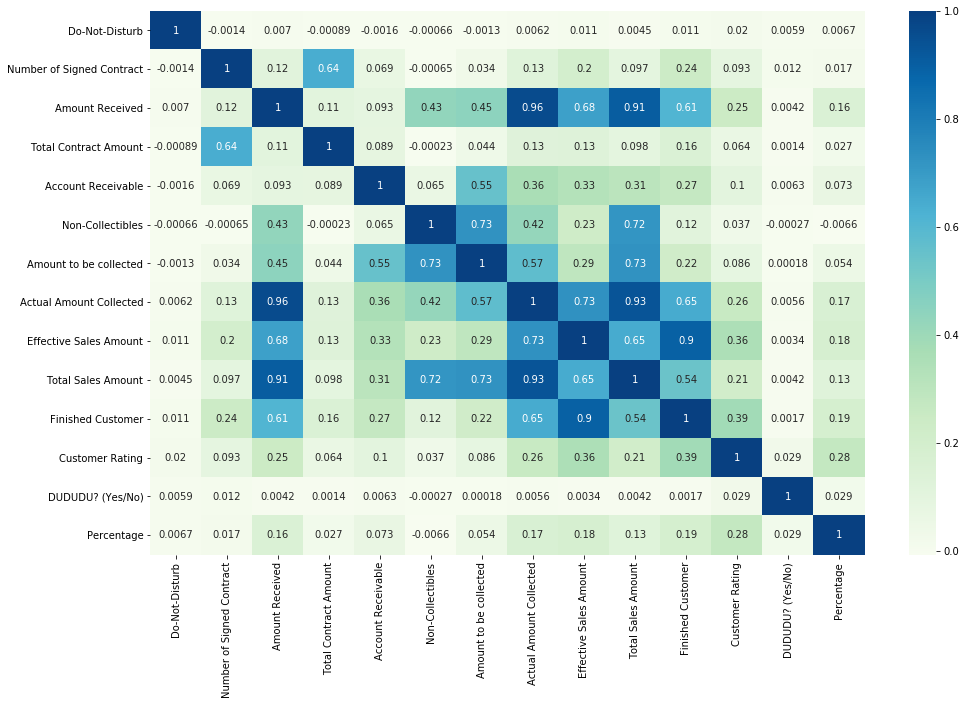

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="GnBu")
plt.show()

1. For effective sales amount, there are moderate correlations (r = 0.68, 0.73, 0.65) between the effective sales amount and amount received, actual amount collected, total sales amount respectively. 
2. And there is a strong correlation (r = 0.9) between the effective sales amount and finished customer.

In [ ]:
len(df['Interest Program'].unique())

80